In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
data = pd.read_csv('Position_Salaries.csv')
X = data.iloc[:,1:-1].values  #0th col similar to 1st col
Y = data.iloc[:, -1].values
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [2]:
linear_model = LinearRegression()
linear_model.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [3]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4) #Creating matrix of X powers from 0 upto degree
X_poly = poly_reg.fit_transform(X)
print(X_poly)

[[1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01]
 [1.000e+00 3.000e+00 9.000e+00 2.700e+01 8.100e+01]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01 2.560e+02]
 [1.000e+00 5.000e+00 2.500e+01 1.250e+02 6.250e+02]
 [1.000e+00 6.000e+00 3.600e+01 2.160e+02 1.296e+03]
 [1.000e+00 7.000e+00 4.900e+01 3.430e+02 2.401e+03]
 [1.000e+00 8.000e+00 6.400e+01 5.120e+02 4.096e+03]
 [1.000e+00 9.000e+00 8.100e+01 7.290e+02 6.561e+03]
 [1.000e+00 1.000e+01 1.000e+02 1.000e+03 1.000e+04]]


In [4]:
poly_reg.fit(X_poly, Y)
model = LinearRegression()
model.fit(X_poly, Y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

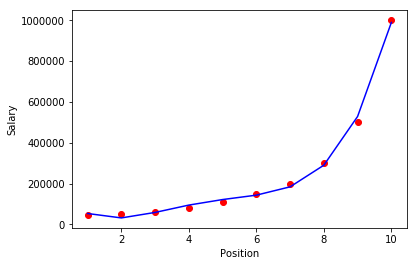

In [5]:

# Visualising the Polynomial Regression results
plt.scatter(X, Y, color = 'red')
plt.plot(X, model.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()



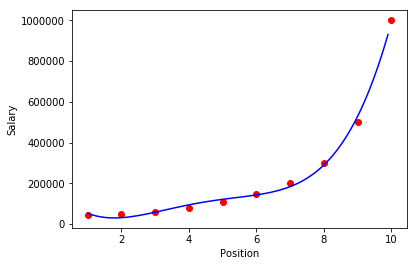

In [6]:
# Visualising the Polynomial Regression results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, Y, color = 'red')
plt.plot(X_grid, model.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()


In [7]:
# Predicting a new result with Polynomial Regression
model.predict(poly_reg.fit_transform(9.1))

array([563097.89204544])